In [ ]:
# The provided data folder is uploaded to the google drive
# Import necessary libraries for handling files and JSON data
from google.colab import drive
import os
import json

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Navigate to the directory containing the dataset
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
## Load data
DKA_patients_df = pd.read_csv("DKA_patients.csv")

## Print the output and the for the available column names
print(DKA_patients_df.columns)
DKA_patients_df.head(10)

Index(['subject_id', 'hadm_id', 'glucose_level', 'ph_level',
       'bicarbonate_level', 'ketone_level', 'gender', 'age', 'length_of_stay',
       'cci', 'ama_discharge', 'insurance', 'num_procedures',
       'related__comorbidity', 'readmission'],
      dtype='object')


,subject_id,hadm_id,glucose_level,ph_level,bicarbonate_level,ketone_level,gender,age,length_of_stay,cci,ama_discharge,insurance,num_procedures,related__comorbidity,readmission
0,10005817,28661809,261.300000,7.290000,14.500000,82.500000,M,66,16.000000,0,0,Medicare,6.0,0,0
1,10015860,24698912,269.500000,7.280000,11.833333,64.000000,M,53,0.625000,0,0,Other,8.0,0,0
2,10039708,28258130,266.000000,7.211429,15.029412,64.250000,F,46,16.166667,0,0,Other,21.0,0,0
3,10054716,25339060,261.200000,7.210000,16.500000,192.000000,M,61,6.041667,0,0,Other,7.0,0,0
4,10080961,24032231,559.000000,7.260000,15.777778,32.500000,F,40,4.708333,0,0,Other,16.0,0,0
5,10084586,21898489,285.500000,7.223333,15.444444,63.333333,F,66,5.083333,0,0,Medicare,3.0,1,0
6,10094679,28902523,251.000000,7.155000,17.000000,15.000000,M,64,15.333333,0,0,Other,16.0,1,0
7,10095570,28612694,295.800000,7.192500,13.142857,21.500000,M,63,3.458333,1,0,Other,6.0,3,0
8,10097659,22071424,264.833333,7.242632,17.000000,50.000000,M,71,3.958333,0,0,Medicare,4.0,0,0
9,10098215,21701015,351.000000,7.176667,14.461538,39.000000,F,56,4.250000,1,0,Other,11.0,1,1


In [ ]:
DKA_patients_df

,subject_id,hadm_id,glucose_level,ph_level,bicarbonate_level,ketone_level,gender,age,length_of_stay,cci,ama_discharge,insurance,num_procedures,related__comorbidity,readmission
0,10005817,28661809,261.300000,7.290000,14.500000,82.500000,M,66,16.000000,0,0,Medicare,6.0,0,0
1,10015860,24698912,269.500000,7.280000,11.833333,64.000000,M,53,0.625000,0,0,Other,8.0,0,0
2,10039708,28258130,266.000000,7.211429,15.029412,64.250000,F,46,16.166667,0,0,Other,21.0,0,0
3,10054716,25339060,261.200000,7.210000,16.500000,192.000000,M,61,6.041667,0,0,Other,7.0,0,0
4,10080961,24032231,559.000000,7.260000,15.777778,32.500000,F,40,4.708333,0,0,Other,16.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,19928591,27383823,253.090909,7.260000,16.200000,20.333333,M,65,9.208333,0,0,Other,12.0,0,0
980,19929426,24829358,299.000000,7.184000,16.000000,44.000000,M,64,10.708333,0,0,Other,6.0,0,0
981,19935090,20730695,326.666667,7.280000,15.000000,34.000000,F,34,5.416667,0,0,Medicare,1.0,0,0
982,19958337,29604470,253.222222,7.247500,14.250000,39.500000,F,27,7.833333,0,0,Other,20.0,0,0


- Data wrangling
- EDA
- Feature Engineering
- Model Selection and Training
- Model Evaluation
- Interpretation and Reporting

_____

### EDA

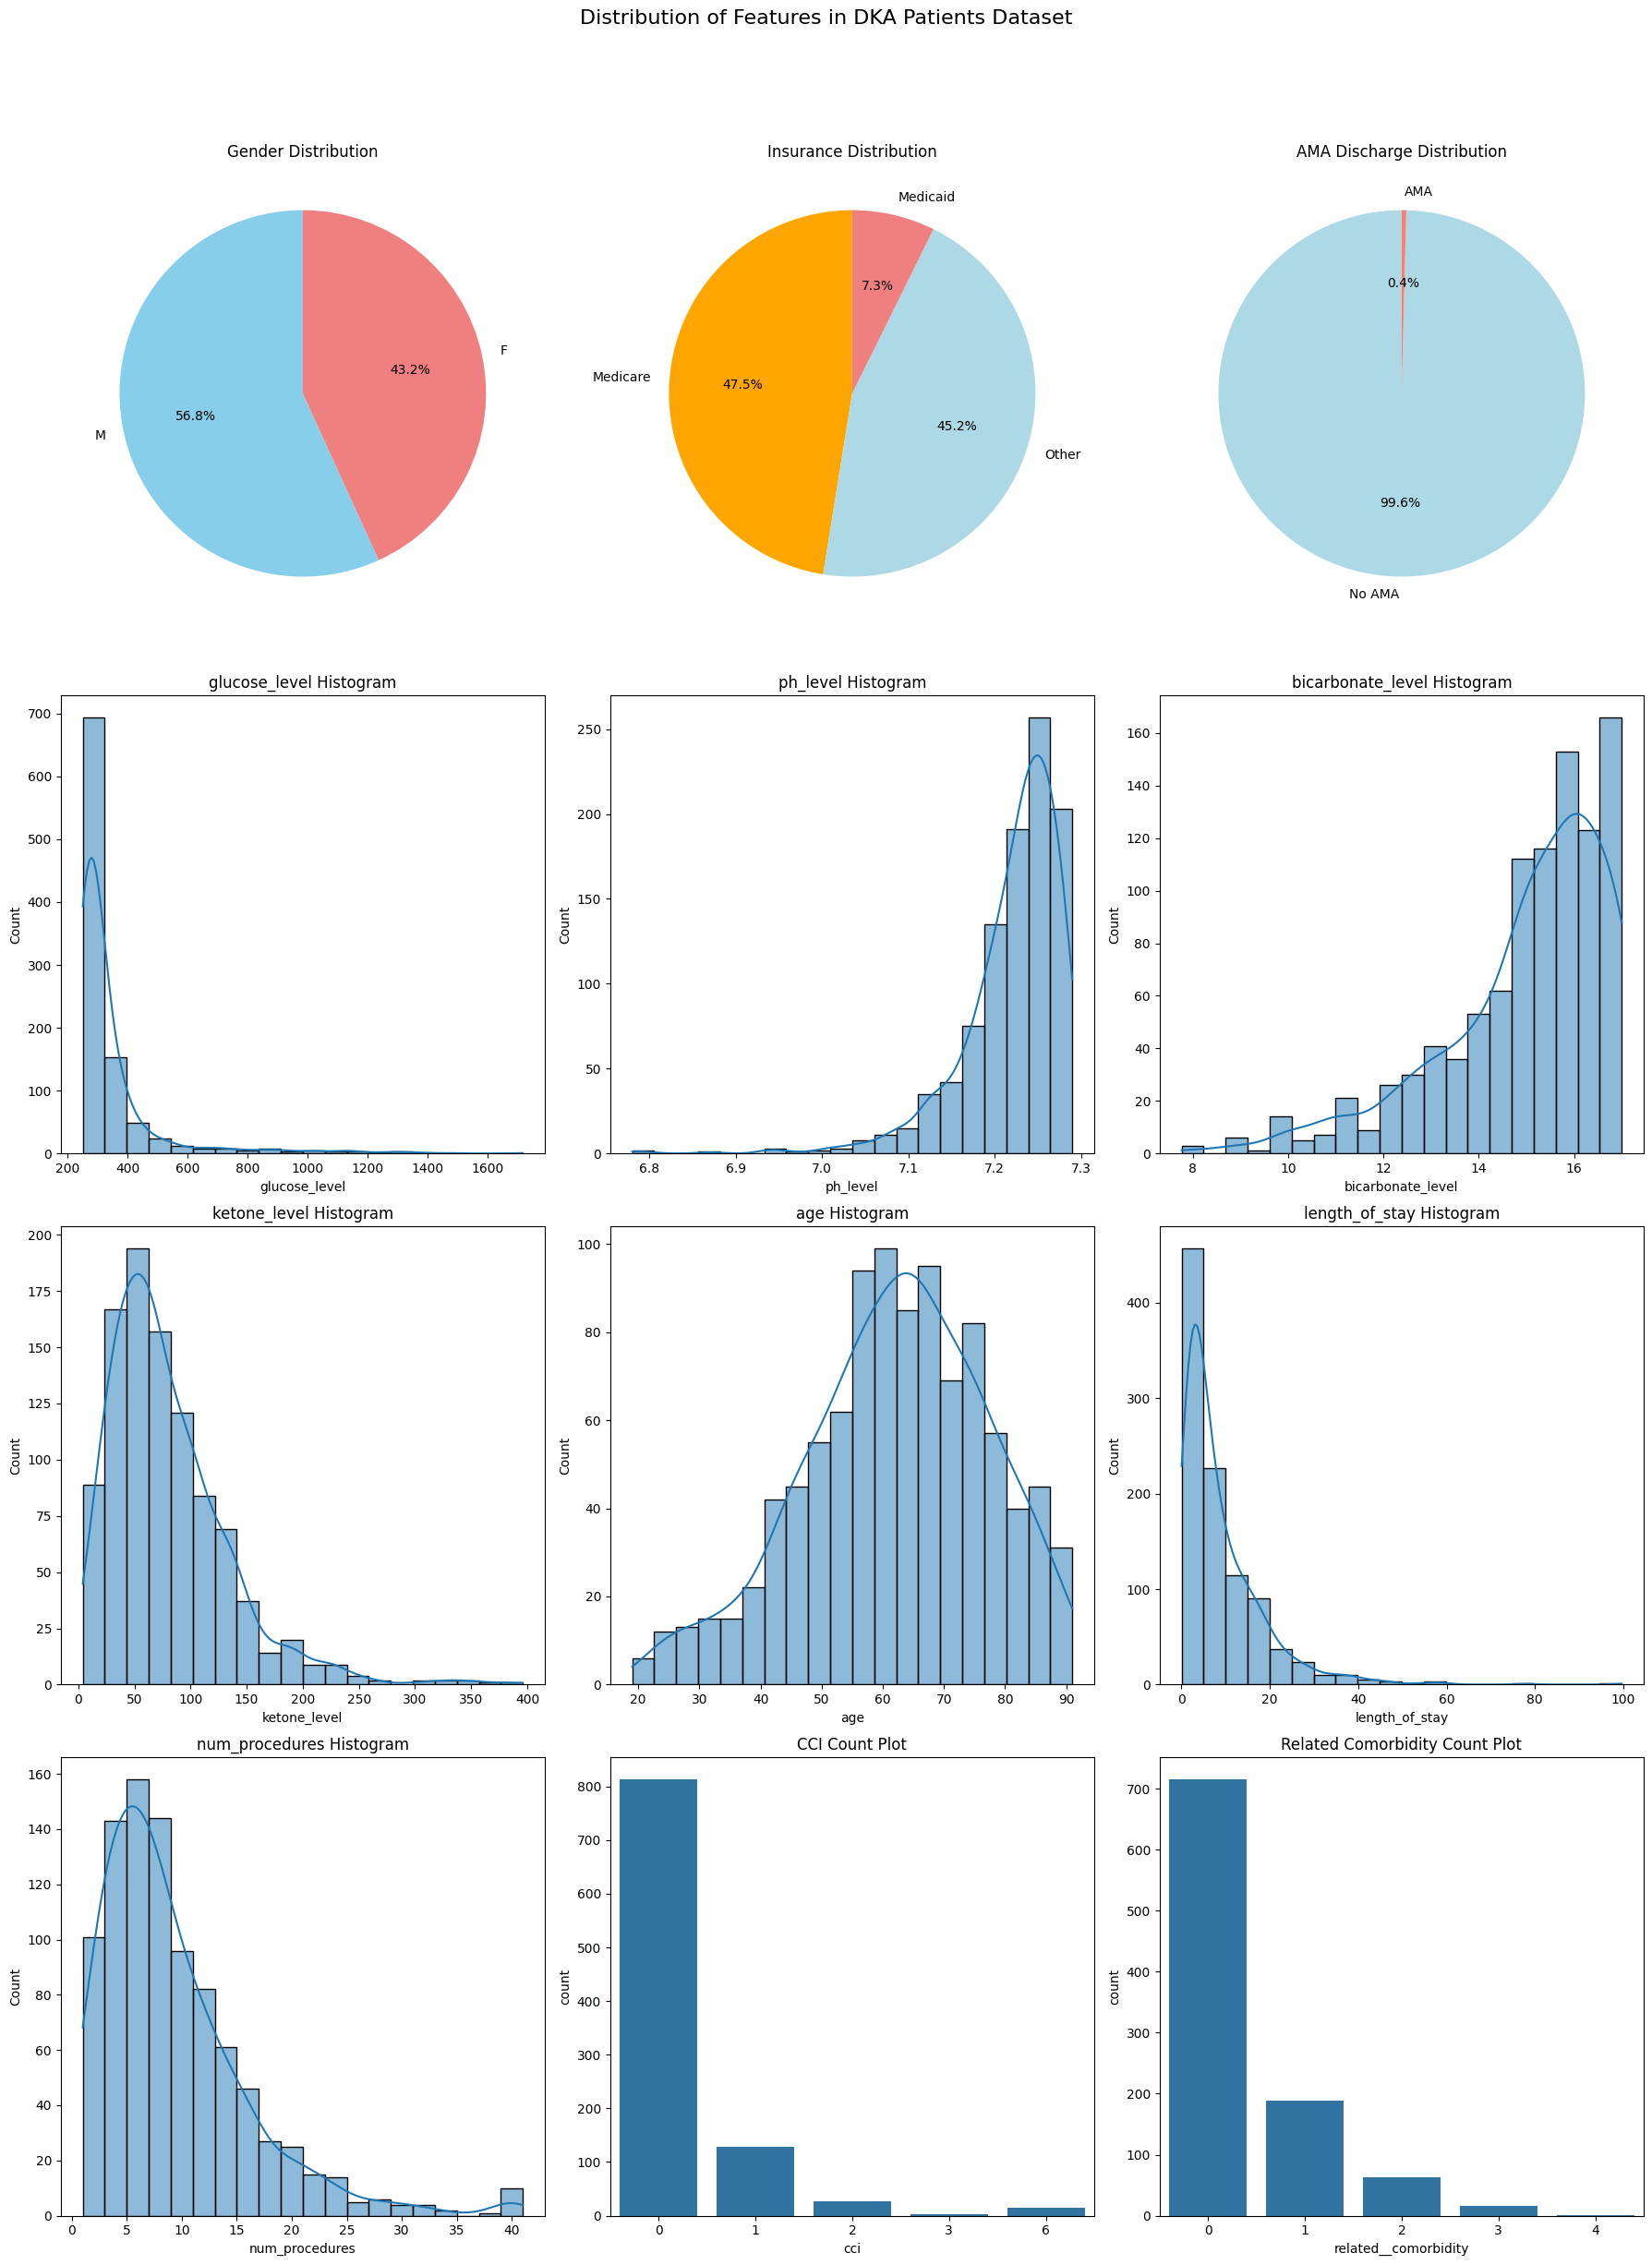

In [ ]:
EDA_df = DKA_patients_df.copy()

import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure and subplots grid with 5 rows and 3 columns
fig, axs = plt.subplots(4, 3, figsize=(18, 24))

# Set the main title for the entire plot
fig.suptitle('Distribution of Features in DKA Patients Dataset', fontsize=16, y=1.02)

# Plot gender distribution pie chart in the first row, first column
gender_counts = EDA_df['gender'].value_counts()
axs[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axs[0, 0].set_title('Gender Distribution')
axs[0, 0].set_aspect('equal')

# Plot insurance distribution pie chart in the first row, second column
insurance_counts = EDA_df['insurance'].value_counts()
axs[0, 1].pie(insurance_counts, labels=insurance_counts.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'lightblue', 'lightcoral'])
axs[0, 1].set_title('Insurance Distribution')
axs[0, 1].set_aspect('equal')

# Plot AMA discharge distribution pie chart in the first row, third column with dynamic labels
ama_discharge_counts = EDA_df['ama_discharge'].value_counts()
ama_discharge_labels = ['No AMA' if value == 0 else 'AMA' for value in ama_discharge_counts.index]
axs[0, 2].pie(ama_discharge_counts, labels=ama_discharge_labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
axs[0, 2].set_title('AMA Discharge Distribution')
axs[0, 2].set_aspect('equal')

# List of numerical features for plotting histograms
numerical_features = ['glucose_level', 'ph_level', 'bicarbonate_level', 'ketone_level', 'age', 'length_of_stay', 'num_procedures']

# Plot histograms for each numerical feature starting from the second row
for i, feature in enumerate(numerical_features):
    row = (i // 3) + 1  # Start from the second row
    col = i % 3
    sns.histplot(EDA_df[feature], bins=20, ax=axs[row, col], kde=True)
    axs[row, col].set_title(f'{feature} Histogram')

# Plot cci and related__comorbidity as count plots in the last row
sns.countplot(x='cci', data=EDA_df, ax=axs[3, 1])
axs[3, 1].set_title('CCI Count Plot')

sns.countplot(x='related__comorbidity', data=EDA_df, ax=axs[3, 2])
axs[3, 2].set_title('Related Comorbidity Count Plot')

# Hide the last empty plot (if there are any)
# axs[4, 2].axis('off')

# Adjust layout for better spacing and aesthetics
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust to make space for the main title
plt.show()


_____

### Data Wrangling

- Missing value
- Data transformation: Transforming Categorical into Numbers (gender, insurance)

In [ ]:
pd.set_option('display.max_columns', None) ## This is only to show all columns when printing a DataFrame

# Create a copy of the dataframe to work with
DKA_df = DKA_patients_df.copy()

# Check missing values
print(DKA_df.isnull().sum(),"\n\n")

# Check the type of data for each column. Notice that 'gender' and 'insurance' are categorical (object)
print(DKA_df.info())

subject_id               0
hadm_id                  0
glucose_level            0
ph_level                 0
bicarbonate_level        0
ketone_level             0
gender                   0
age                      0
length_of_stay           0
cci                      0
ama_discharge            0
insurance                0
num_procedures          40
related__comorbidity     0
readmission              0
dtype: int64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject_id            984 non-null    int64  
 1   hadm_id               984 non-null    int64  
 2   glucose_level         984 non-null    float64
 3   ph_level              984 non-null    float64
 4   bicarbonate_level     984 non-null    float64
 5   ketone_level          984 non-null    float64
 6   gender                984 non-null    object 
 7   age       

In [ ]:
DKA_df['readmission'].value_counts()

,count
readmission,
0,692
1,292


In [ ]:
# test_df = DKA_df.dropna(subset=['num_procedures'])
# test_df

In [ ]:
# test_df['readmission'].value_counts()


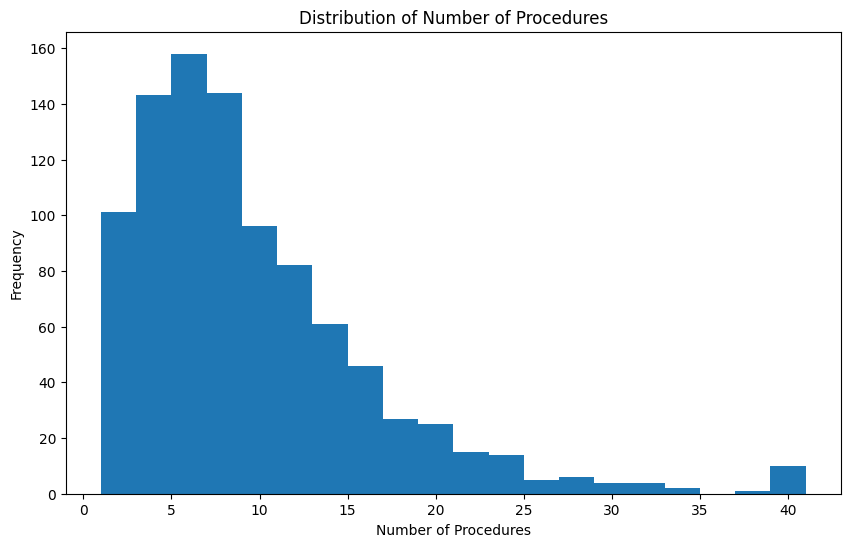

In [ ]:
# Plot histogram for the 'num_procedures' column
plt.figure(figsize=(10, 6))
DKA_patients_df['num_procedures'].hist(bins=20)
plt.title('Distribution of Number of Procedures')
plt.xlabel('Number of Procedures')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [ ]:
# Step 1: Handling Missing Values
# Fill missing values in 'num_procedures' with the median of the column
DKA_df['num_procedures'].fillna(DKA_df['num_procedures'].median(), inplace=True)
# DKA_df['num_procedures'].fillna(DKA_df['num_procedures'].mean(), inplace=True)
# DKA_df = DKA_df.dropna(subset=['num_procedures'])

# Step 2: Transforming Categorical Data
# For Gender (Male: 1, Female: 0)
DKA_df['gender'] = DKA_df['gender'].map({'M': 1, 'F': 0})


# One-hot encoding for 'insurance'
insurance_dummies = pd.get_dummies(DKA_df['insurance'], prefix='insurance')
DKA_df = pd.concat([DKA_df, insurance_dummies], axis=1)
DKA_df.drop('insurance', axis=1, inplace=True)

# Convert boolean to integers for insurance dummies
DKA_df['insurance_Medicaid'] = DKA_df['insurance_Medicaid'].astype(int)
DKA_df['insurance_Medicare'] = DKA_df['insurance_Medicare'].astype(int)
DKA_df['insurance_Other'] = DKA_df['insurance_Other'].astype(int)

# remove subject_id and hadm_id
DKA_df = DKA_df.drop(['subject_id', 'hadm_id'], axis = 1)

In [ ]:
DKA_df

,glucose_level,ph_level,bicarbonate_level,ketone_level,gender,age,length_of_stay,cci,ama_discharge,num_procedures,related__comorbidity,readmission,insurance_Medicaid,insurance_Medicare,insurance_Other
0,261.300000,7.290000,14.500000,82.500000,1,66,16.000000,0,0,6.0,0,0,0,1,0
1,269.500000,7.280000,11.833333,64.000000,1,53,0.625000,0,0,8.0,0,0,0,0,1
2,266.000000,7.211429,15.029412,64.250000,0,46,16.166667,0,0,21.0,0,0,0,0,1
3,261.200000,7.210000,16.500000,192.000000,1,61,6.041667,0,0,7.0,0,0,0,0,1
4,559.000000,7.260000,15.777778,32.500000,0,40,4.708333,0,0,16.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,253.090909,7.260000,16.200000,20.333333,1,65,9.208333,0,0,12.0,0,0,0,0,1
980,299.000000,7.184000,16.000000,44.000000,1,64,10.708333,0,0,6.0,0,0,0,0,1
981,326.666667,7.280000,15.000000,34.000000,0,34,5.416667,0,0,1.0,0,0,0,1,0
982,253.222222,7.247500,14.250000,39.500000,0,27,7.833333,0,0,20.0,0,0,0,0,1


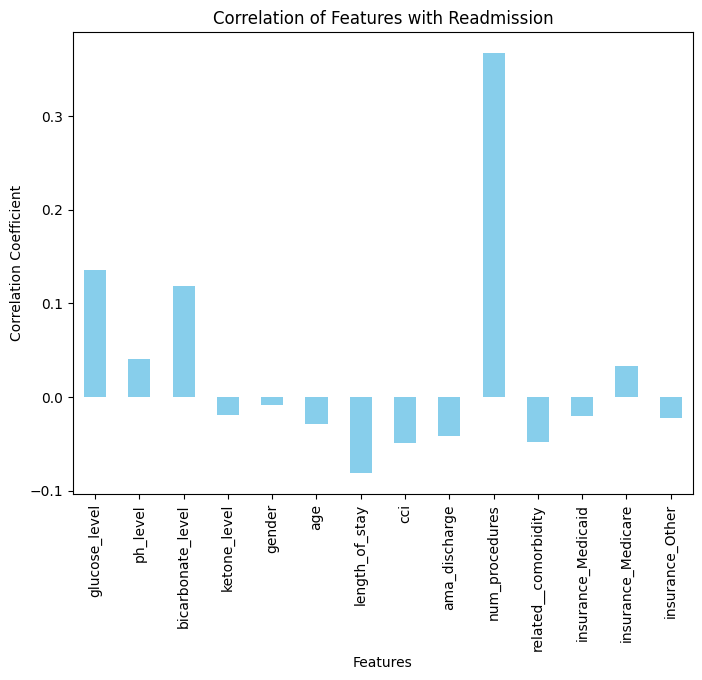

In [ ]:
# Correlation with readmission
readmission_corr = DKA_df.corr()['readmission'].drop('readmission')

# Plotting the correlation of features with readmission
plt.figure(figsize=(8, 6))
readmission_corr.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Readmission')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

### Address class imbalance with SMOTE

smote

In [ ]:
from imblearn.over_sampling import SMOTE

X = DKA_df.drop('readmission', axis=1)  # Features
y = DKA_df['readmission']  # Target

smote = SMOTE(random_state=90089)
X_res, y_res = smote.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_res).value_counts())


readmission
0    692
1    692
Name: count, dtype: int64


Under-sampling the Majority Class

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = DKA_df.drop('readmission', axis=1)  # Features
y = DKA_df['readmission']  # Target

# Implementing Random Under Sampling
rus = RandomUnderSampler(random_state=90089)
X_rus, y_rus = rus.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_rus).value_counts())


readmission
0    292
1    292
Name: count, dtype: int64


Borderline-SMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

X = DKA_df.drop('readmission', axis=1)  # Features
y = DKA_df['readmission']  # Target

# Setting up Borderline-SMOTE
borderline_smote = BorderlineSMOTE(random_state=90089, kind='borderline-1')
X_resampled, y_resampled = borderline_smote.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

readmission
0    692
1    692
Name: count, dtype: int64


### Data splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=90089)

In [ ]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=90089)


In [ ]:
X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=90089)


### Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=90089)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=90089)

In [ ]:
# Model predictions
y_pred = rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

[[108  15]
 [ 30 124]]
              precision    recall  f1-score   support

           0      0.783     0.878     0.828       123
           1      0.892     0.805     0.846       154

    accuracy                          0.838       277
   macro avg      0.837     0.842     0.837       277
weighted avg      0.843     0.838     0.838       277



In [ ]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation with recall as the scoring metric
recall_scores = cross_val_score(rf_classifier, X_res, y_res, cv=5, scoring='recall')

print("Recall Cross-validation scores:", recall_scores)
print("Average recall:", recall_scores.mean())

Recall Cross-validation scores: [0.60144928 0.62318841 0.89208633 0.94244604 0.91304348]
Average recall: 0.7944427067042019


In [ ]:
y_test

,readmission
1145,1
237,0
1198,1
584,0
1320,1
...,...
199,1
107,1
1247,1
1369,1


In [ ]:
y_test.value_counts()

,count
readmission,
1,154
0,123


In [ ]:
X_train

,glucose_level,ph_level,bicarbonate_level,ketone_level,gender,age,length_of_stay,cci,ama_discharge,num_procedures,related__comorbidity,insurance_Medicaid,insurance_Medicare,insurance_Other
1092,1292.456122,7.249796,15.745218,221.032106,1,64,2.956822,0,0,5.951187,0,0,0,0
1018,1076.666929,7.265028,14.242715,35.236886,1,65,1.942557,0,0,20.805789,0,0,0,0
502,280.000000,7.208750,14.346154,100.000000,0,66,13.416667,0,0,7.000000,0,0,0,1
1045,269.689531,7.246938,16.054000,51.018367,1,64,17.014204,0,0,24.168788,0,0,1,0
355,298.000000,7.175000,15.000000,45.000000,0,58,9.958333,0,0,11.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,316.700000,7.208333,11.500000,69.000000,0,21,0.708333,0,0,7.000000,0,0,0,1
325,404.428571,7.230000,13.333333,144.000000,0,62,2.791667,1,0,2.000000,2,0,0,1
336,359.250000,7.210000,16.250000,62.000000,1,56,13.791667,0,0,40.000000,0,0,1,0
1082,277.855961,7.221436,13.507371,16.936197,1,25,19.108837,0,0,21.060854,0,0,0,1


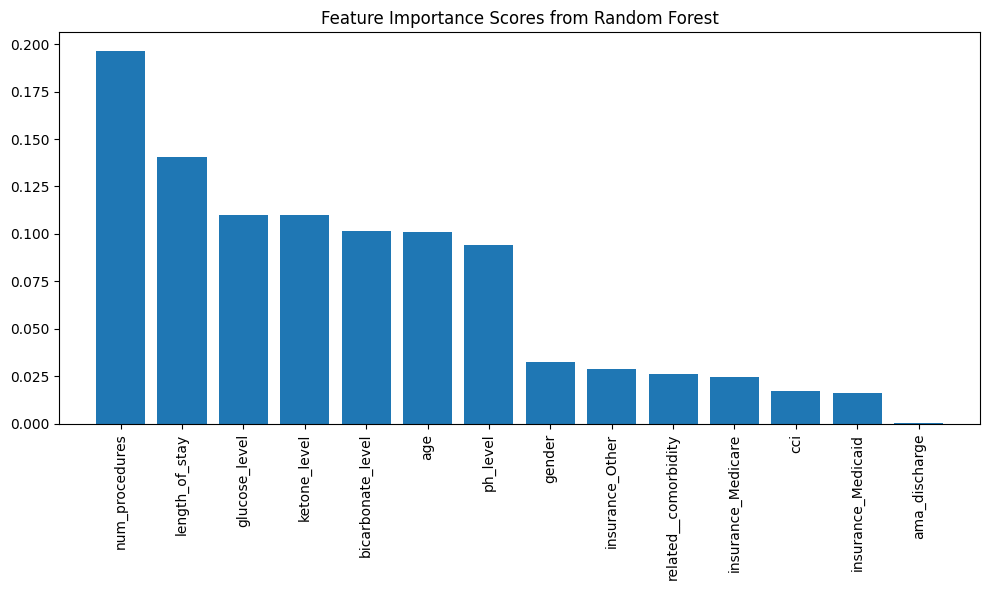

In [ ]:
import numpy as np
# Get the feature importance scores
importances = rf_classifier.feature_importances_

# Get the feature names from your dataframe (X_train should have feature names)
feature_names = X_train.columns

# Sort the features by importance score
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance Scores from Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

___

In [ ]:
# # Use grid search to optimize model for the above random forest model
# # Define the parameter grid
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create a RandomForestClassifier object
# rf = RandomForestClassifier(random_state=90089)

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# # Fit the grid search to the data
# # X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=90089)
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

# # Use the best estimator to make predictions
# y_pred = grid_search.best_estimator_.predict(X_test)

# # Evaluate the predictions
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred, digits=3))

In [ ]:
# recall_scores2 = cross_val_score(grid_search, X_res, y_res, cv=5, scoring='recall')

# print("Recall Cross-validation scores:", recall_scores2)
# print("Average recall:", recall_scores2.mean())

___

In [ ]:
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=90089)
rf_classifier2.fit(X_train_rus, y_train_rus)

y_pred2 = rf_classifier2.predict(X_test_rus)


print(confusion_matrix(y_test_rus, y_pred2))
print(classification_report(y_test_rus, y_pred2, digits=3))

[[46 18]
 [24 29]]
              precision    recall  f1-score   support

           0      0.657     0.719     0.687        64
           1      0.617     0.547     0.580        53

    accuracy                          0.641       117
   macro avg      0.637     0.633     0.633       117
weighted avg      0.639     0.641     0.638       117



In [ ]:
rf_classifier3 = RandomForestClassifier(n_estimators=100, random_state=1)
rf_classifier3.fit(X_train_bs, y_train_bs)

y_pred3 = rf_classifier3.predict(X_test_bs)


print(confusion_matrix(y_test_bs, y_pred3))
print(classification_report(y_test_bs, y_pred3, digits=3))

[[109  14]
 [ 32 122]]
              precision    recall  f1-score   support

           0      0.773     0.886     0.826       123
           1      0.897     0.792     0.841       154

    accuracy                          0.834       277
   macro avg      0.835     0.839     0.834       277
weighted avg      0.842     0.834     0.834       277



____

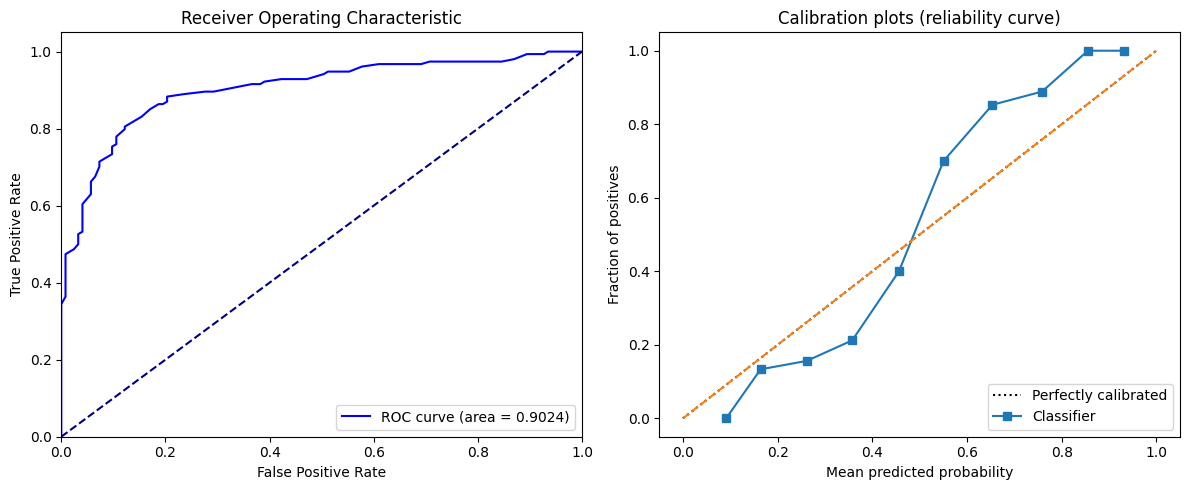

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import calibration_curve, CalibrationDisplay

# Predict probabilities
y_proba = rf_classifier.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))

# Plotting the ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Calibration Curve
plt.subplot(1, 2, 2)
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
CalibrationDisplay.from_predictions(y_test, y_proba, n_bins=10, ax=plt.gca())
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Calibration plots (reliability curve)')
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")

plt.tight_layout()
plt.show()
